<a href="https://colab.research.google.com/github/GuillermoFidalgo/Connection-Chart/blob/main/GAFR_copy_of_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In [ ]:
!ls

new_connections.csv  sample_data


In [ ]:
# Load connection chart

connection_chart = pd.read_csv("new_connections.csv")


In [ ]:
connection_chart

,Investigator,Role,University,Research Project(s),Research Connections
0,Aeron,Senior Investigator,Tufts,Generative Networks for LArTPCs,"Taritree Wongjirad, Malik, Rivera, Manian"
1,Ba,Senior Investigator,Harvard,Topographic Regularization with Group Sparse A...,"Jesse Thaler, Malik, Rivera"
2,Harris,Senior Investigator,MIT,Deep Neural Embedding into physics motivated l...,"CMS, Malik, Rivera, Manian"
3,Thaler,Senior Investigator,MIT,Intelligent Point Cloud Processing with Energy...,"Demba Ba, Mike Williams, Malik, Rivera, Manian"
4,Williams,Senior Investigator,MIT,Robust AI for Real-Time Applications; An Effec...,"Jesse Thaler, LHCb, Malik, Rivera, Manian"
5,Wongjirad,Senior Investigator,Tufts,Improving 3D Deep Learning for LArTPCs with Eq...,"Shuchin Aeron, Malik, Manian"
6,Pehlevan,Senior Investigator,Harvard,Theorectical Neuroscience and Theory of Neural...,"Malik, Manian"
7,Malik,Senior Investigator,UPRM,"BSM Physics, Detector, DQM, Simulations, ML ap...","Manian, Aeron, Williams, Thaler, Harris, Wongj..."
8,Manian,Senior Investigator,UPRM,NaN,"Aeron, Williams, Thaler, Harris, Wongjirad, Ri..."
9,Rivera,Senior Investigator,UPRM,NaN,"Manian, Aeron, Williams, Thaler, Harris, Wongj..."


In [ ]:
# Compute edges (connections)
edges = []

for i in range(len(connection_chart['Research Connections'])):
    matches = connection_chart['Research Connections'].str.contains(connection_chart['Investigator'][i])
    connections = np.where(matches == True)
    for connection in connections[0]:
        edges.append([i, connection])
        
edges = np.array(edges)

In [ ]:
connection_chart.loc[connection_chart['Role'] == 'Fellow', "University"] = "IAIFI Fellow"

In [ ]:
ANumber= np.random.rand(5,2)
ANumber

array([[0.4979777 , 0.88655507],
       [0.72407436, 0.07049655],
       [0.66499405, 0.12266609],
       [0.35205399, 0.672631  ],
       [0.62402658, 0.37870387]])

In [ ]:
ANumber[0][1]

0.8865550659467594

In [ ]:
alignment_empirical_analytic = np.array([[0, 0.7], [1, 0.3], [2, .75], [3, 0.7], [4, 0.5], [5, 0.65],
                                         [6, ANumber[0][0]], [7, 0.75],
                                          [8, ANumber[1][0]],
                                          [9, ANumber[2][0]],
                                          [10, ANumber[3][0]], 
                                         [11, 0.6],
                                         [12, ANumber[4][0]] ])
alignment_physics_ai = np.array([[0, 0.4], [1, 0.2], [2, .65], [3, 0.65], [4, 0.4], [5, 0.6],
                                 [6, ANumber[0][1]],
                                 [7, 0.65],
                                [8, ANumber[1][1]],
                                [9, ANumber[2][1]],
                                [10, ANumber[3][1]], [11, 0.35], 
                                 [12, ANumber[4][1]]])

In [ ]:
# Add a little bit of jitter to the points so they don't overlap a lot
# Each time this cell is run, a new random jitter is added
std_jitter = 0.02  # Standard deviation (size) of the jitter

x = alignment_empirical_analytic[:, 1] + np.random.randn(len(connection_chart)) * std_jitter
y = alignment_physics_ai[:, 1] + np.random.randn(len(connection_chart)) * std_jitter

In [ ]:
# Colours for the different institutions
colors_insti_dict = {"MIT": ("black"), "Harvard": ("crimson"), "Northeastern":"limegreen", "Tufts":"dodgerblue", "IAIFI Fellow":"yellow",
                     "UPRM": "orange"}

In [ ]:
colors_plot = []

for i in range(len(connection_chart['University'])):
    colors_plot.append(colors_insti_dict[connection_chart['University'][i]])

In [ ]:
# Not needed in Binder version. Only needed if running on Google Colab
# ! pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from adjustText import adjust_text

In [ ]:
import matplotlib.font_manager as font_manager
from mpl_toolkits.axisartist.axislines import AxesZero

In [ ]:
# Center plot; all numbers run from [-1, 1]
x = (x - 0.5) / 0.5
y = (y - 0.5) / 0.5

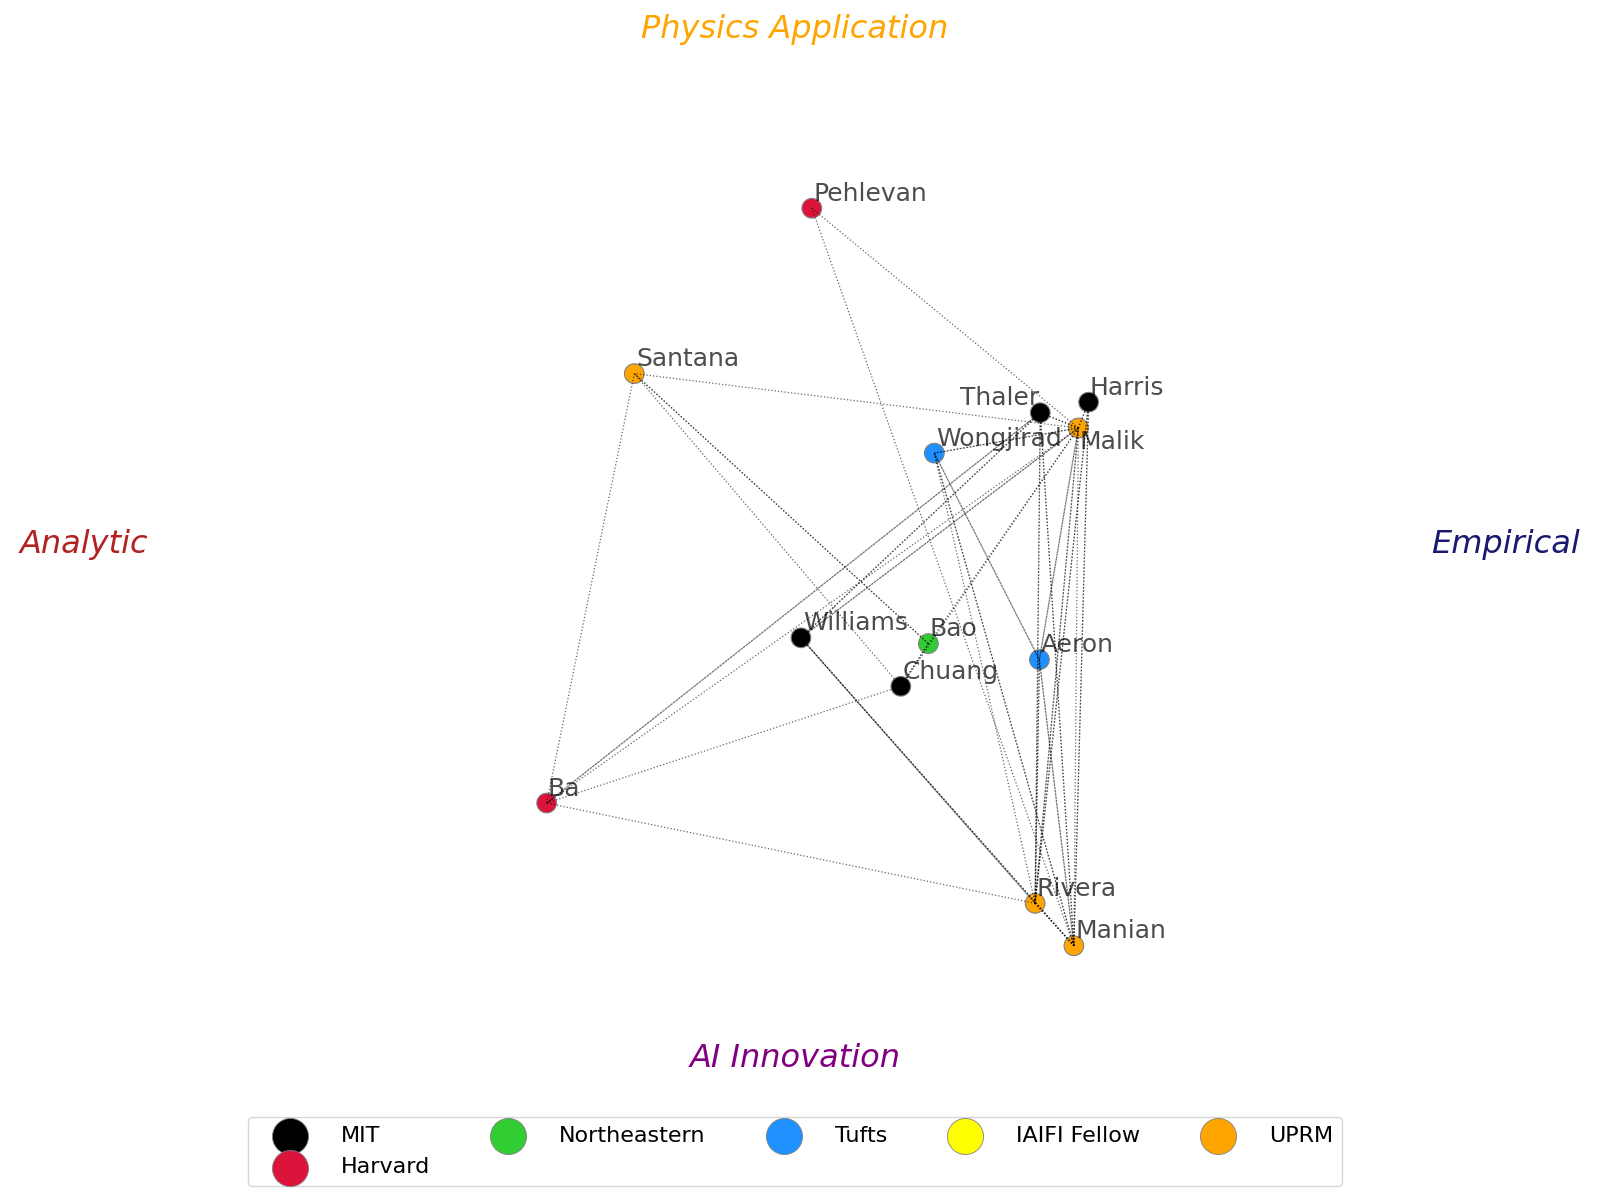

In [ ]:
# Figure object
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(axes_class=AxesZero)

# Set fonts
font = {"fontsize":23, "style":"italic"}  # Axis label text
font_annotations = {"fontsize":18}  # Annotations text

# Set axis going through center
for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_visible(False)

# Hide four borders
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

# Scatter plot
ax.scatter(x, y, c=colors_plot, s=200, edgecolors='grey', linewidths=0.8)

# Text annotations
texts = []
for i, label in enumerate(connection_chart['Investigator']):
    # Annotate the point with the label
    texts.append(ax.annotate(label, (x[i], y[i]), ha='center', alpha=0.7, **font_annotations))

# Connection lines
for edge in edges:
    ax.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], c='k', lw=0.9, ls=':', alpha=0.6)

## Make legend

# Define the labels for each data point
labels = colors_insti_dict.keys()
colors = [colors_insti_dict[key] for key in colors_insti_dict.keys()]

# Create an empty list to store the legend handles
handles = []

# Loop through the labels and data points, and append the scatter plot handles to the list of legend handles
for i, label in enumerate(labels):
    handles.append(ax.scatter([], [], c=colors[i], label=label, s=75, edgecolors='grey', linewidths=0.6))

# Create the legend with the list of handles and labels
ax.legend(handles=handles, prop=font_manager.FontProperties(size=16), loc='upper center', bbox_to_anchor=(0.5, -0.1), handlelength=3, markerscale=3, frameon=True, fancybox=True, shadow=False, ncol=5)

# Set legend outside of chart
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=20, handlelength=3, markerscale=3.)

## Set plot limits, ticks, and label axes

ax.set_xlim(-1.02, 1.02)
ax.set_ylim(-1.02, 1.02)

# Hide tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# Axis labels
ax.text(-1.22, 0., "Analytic", horizontalalignment='center', verticalalignment='center', **font, color='firebrick')
ax.text(1.22, 0., "Empirical", horizontalalignment='center',  verticalalignment='center', **font, color='midnightblue')
ax.text(0., -1.12, "AI Innovation", horizontalalignment='center', verticalalignment='center', **font, color='purple')
ax.text(0., 1.12, "Physics Application", horizontalalignment='center',  verticalalignment='center', **font, color='orange')

# Color interpolation
#ax.imshow([[-1,-1],[1,1]], cmap=plt.cm.PuOr, interpolation='bicubic', extent=plt.xlim() + plt.ylim(), alpha=0.4)  
#ax.imshow([[-1,1],[-1,1]], cmap=plt.cm.RdBu, interpolation='bicubic', extent=plt.xlim() + plt.ylim(), alpha=0.4)  

# Adjust text so it doesn't overlap
adjust_text(texts)

# Save
plt.tight_layout()
plt.savefig("New_connections.pdf")

In [ ]:
# Making new excel sheet
connection_chart.to_csv('new_connections.csv',index=False)